## libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import stats

## observed data

In [2]:
flip_data = np.array(["h","h","h","h","h","t"])
flip_data = np.sort(flip_data)
flip_data

array(['h', 'h', 'h', 'h', 'h', 't'], dtype='<U1')

## model

In [3]:
def coin_flipper(prior,n_obs):
    
    flips = np.random.choice(["h","t"],size = n_obs, p=[prior,1-prior])
    
    y_star = flips
    
    return y_star

In [4]:
def ar_abc(observed_data,simulation,num_iter):
    
    posterior_distribution = []
    
    for i in range(num_iter):
        
        # draw from the prior:
        prior = np.random.uniform(low=0, high=1)
        
        # simulate using the prior:
        y_star = simulation(prior,observed_data.shape[0])
        y_star = np.sort(y_star)
        
        # admit the prior sample based upon the accept reject criterion:
        if( (y_star == observed_data).all() == True):
            #print("hi")
            posterior_distribution.append(prior)
            
    return posterior_distribution,len(posterior_distribution)/num_iter

In [195]:
post,ar = ar_abc(flip_data,coin_flipper,100000)

In [196]:
ar

0.14139

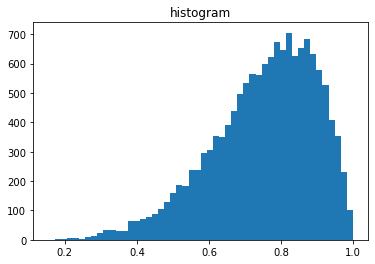

In [197]:
plt.hist(post, bins = 50) 
plt.title("histogram") 
plt.show()

## Another prior

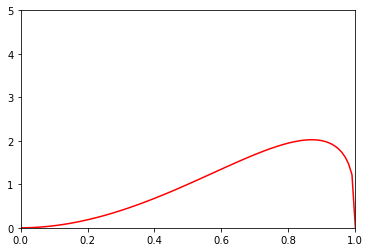

In [218]:
x = np.linspace(0,1,100)
fig, ax = plt.subplots(1, 1)
plt.xlim(0, 1)
plt.ylim(0,5)
plt.plot(x, stats.beta.pdf(x, 3, 1.3), 'r-')

In [219]:
def ar_abc(observed_data,simulation,num_iter):
    
    posterior_distribution = []
    
    for i in range(num_iter):
        
        # draw from the prior:
        prior = np.random.beta(4, 2)
        
        # simulate using the prior:
        y_star = simulation(prior,observed_data.shape[0])
        y_star = np.sort(y_star)
        
        # admit the prior sample based upon the accept reject criterion:
        if( (y_star == observed_data).all() == True):
            #print("hi")
            posterior_distribution.append(prior)
            
    return posterior_distribution,len(posterior_distribution)/num_iter

In [220]:
post,ar = ar_abc(flip_data,coin_flipper,100000)

In [221]:
ar

0.24271

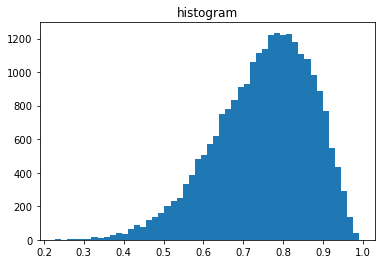

In [222]:
plt.hist(post, bins = 50) 
plt.title("histogram") 
plt.show()

## dungeons and dragons

In [5]:
attack_data = np.random.randint(low=1, high=20,size=50)
attack_data = attack_data +3
attack_data = np.sort(attack_data)
attack_data

array([ 4,  4,  4,  4,  4,  5,  6,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,
        9,  9, 10, 10, 10, 10, 10, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 15, 16, 17, 18, 19, 20, 20, 21, 21, 21, 22, 22, 22])

In [6]:
def attack_role(prior,n_obs):
    
    attack_role = np.random.randint(low=1, high=20,size=n_obs)
    
    y_star = attack_role + prior
    
    return y_star

In [7]:
rng = np.random.default_rng()
rng.integers(low=1, high=30)

22

In [385]:
def ar_abc_2(observed_data,simulation,num_iter):
    
    posterior_distribution = []
    
    for i in range(num_iter):
        
        # draw from the prior:
        prior = np.random.randint(low=1, high=30)
        
        # simulate using the prior:
        y_star = simulation(prior,observed_data.shape[0])
        y_star = np.sort(y_star)
        #print(y_star)
        
        # admit the prior sample based upon the accept reject criterion:
        if( (y_star == observed_data).all() == True):
            #print("hi")
            posterior_distribution.append(prior)
            
    return posterior_distribution,len(posterior_distribution)/num_iter

In [386]:
post,ar = ar_abc_2(attack_data,attack_role,100000)
ar

0.0

In [ ]:
plt.hist(post, bins = 50) 
plt.title("histogram") 
plt.show()

### inexact

In [9]:
attack_data = np.random.randint(low=1, high=20,size=6)
attack_data = attack_data +3
attack_data = np.sort(attack_data)
attack_data

array([ 5,  6,  7, 15, 17, 22])

#### what should epsilon be?

In [22]:
def ar_abc_3(observed_data,simulation,distance_metric,eta,num_iter):
    
    posterior_distribution = []
    
    n_obs = observed_data.shape[0]
    
    for i in range(num_iter):
        
        # draw from the prior:
        prior = np.random.randint(low=1, high=30)
        
        # simulate using the prior:
        y_star = simulation(prior,n_obs)
        y_star = np.sort(y_star)
        #print(y_star)
        
        # admit the prior sample based upon the accept reject criterion:
        # 1 is best
        if( distance_metric(observed_data,y_star,n_obs) <eta ):
            posterior_distribution.append(prior)
            
    return posterior_distribution,len(posterior_distribution)/num_iter

In [18]:
def sse(y,y_star,n_obs):
    sse = y-y_star
    sse = sse*sse
    sse = np.sum(sse)
    sse = sse/n_obs
    sse = np.sqrt(sse)
    
    return sse
    

In [19]:
post,ar = ar_abc_3(attack_data,attack_role,sse,10,100000)
ar

0.3792

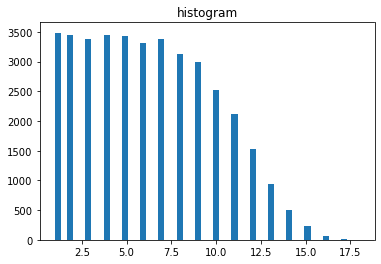

hmm amost looks like a sample from the prior...

0.18283


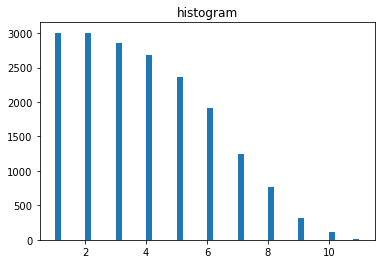

In [23]:
post,ar = ar_abc_3(attack_data,attack_role,sse,5,100000)
print(ar)
plt.hist(post, bins = 50) 
plt.title("histogram") 
plt.show()

0.01182


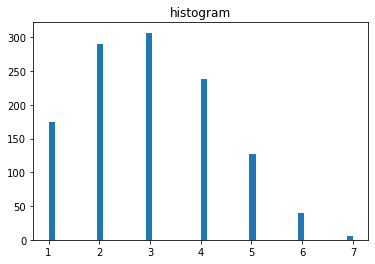

In [24]:
post,ar = ar_abc_3(attack_data,attack_role,sse,2,100000)
print(ar)
plt.hist(post, bins = 50) 
plt.title("histogram") 
plt.show()

0.00051


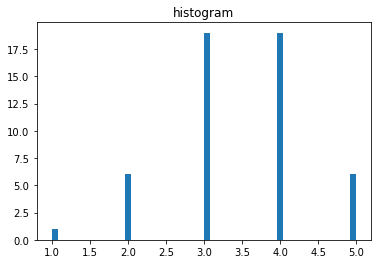

In [25]:
post,ar = ar_abc_3(attack_data,attack_role,sse,1,100000)
print(ar)
plt.hist(post, bins = 50) 
plt.title("histogram") 
plt.show()

0.00035


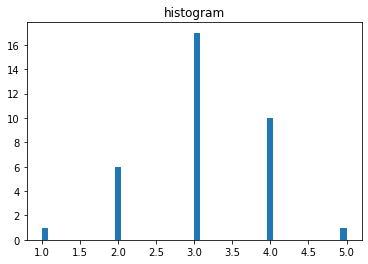

In [28]:
post,ar = ar_abc_3(attack_data,attack_role,sse,1,100000)
print(ar)
plt.hist(post, bins = 50) 
plt.title("histogram") 
plt.show()

what happens if we increase the sample size?

In [32]:
attack_data = np.random.randint(low=1, high=20,size=1000)
attack_data = attack_data +3
attack_data = np.sort(attack_data)

0.05482


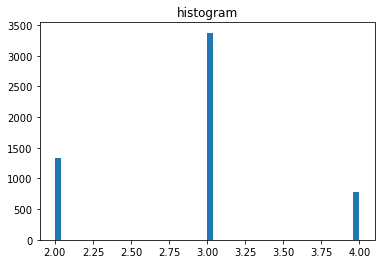

In [33]:
post,ar = ar_abc_3(attack_data,attack_role,sse,1,100000)
print(ar)
plt.hist(post, bins = 50) 
plt.title("histogram") 
plt.show()

### better priors on monster strength

### sufficient statistics

## a traditional bayesian detour - trivial likelihoods

## damage dice

## joint model of attack and damage

## MCMC-ABC